In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import get_ts

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = get_ts(days=600)

In [4]:
df.head()

,prices
dates,
2020-02-29,0.137246
2020-03-01,0.139774
2020-03-02,0.142004
2020-03-03,0.165838
2020-03-04,0.154394


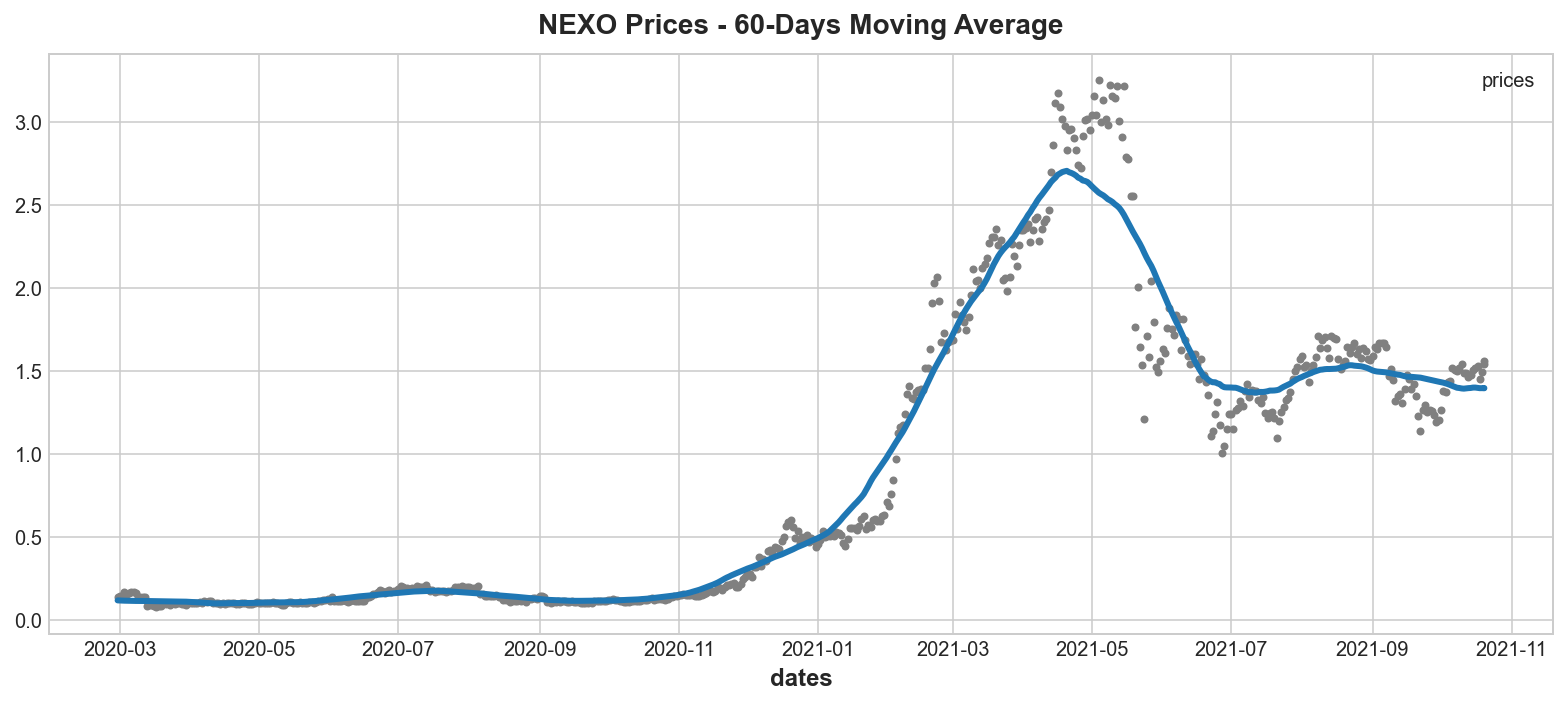

In [5]:
window = 60
min_periods = window // 2

moving_average = df.rolling(
    window=window,       # x-days window
    center=True,      # puts the average at the center of the window
    min_periods=min_periods,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title=f"NEXO Prices - {window}-Days Moving Average", legend=False,
);

In [6]:
# https://www.kaggle.com/learn/time-series
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
dates,,
2020-02-29,1.0,1.0
2020-03-01,1.0,2.0
2020-03-02,1.0,3.0
2020-03-03,1.0,4.0
2020-03-04,1.0,5.0


In [7]:
from sklearn.linear_model import LinearRegression

y = df["prices"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

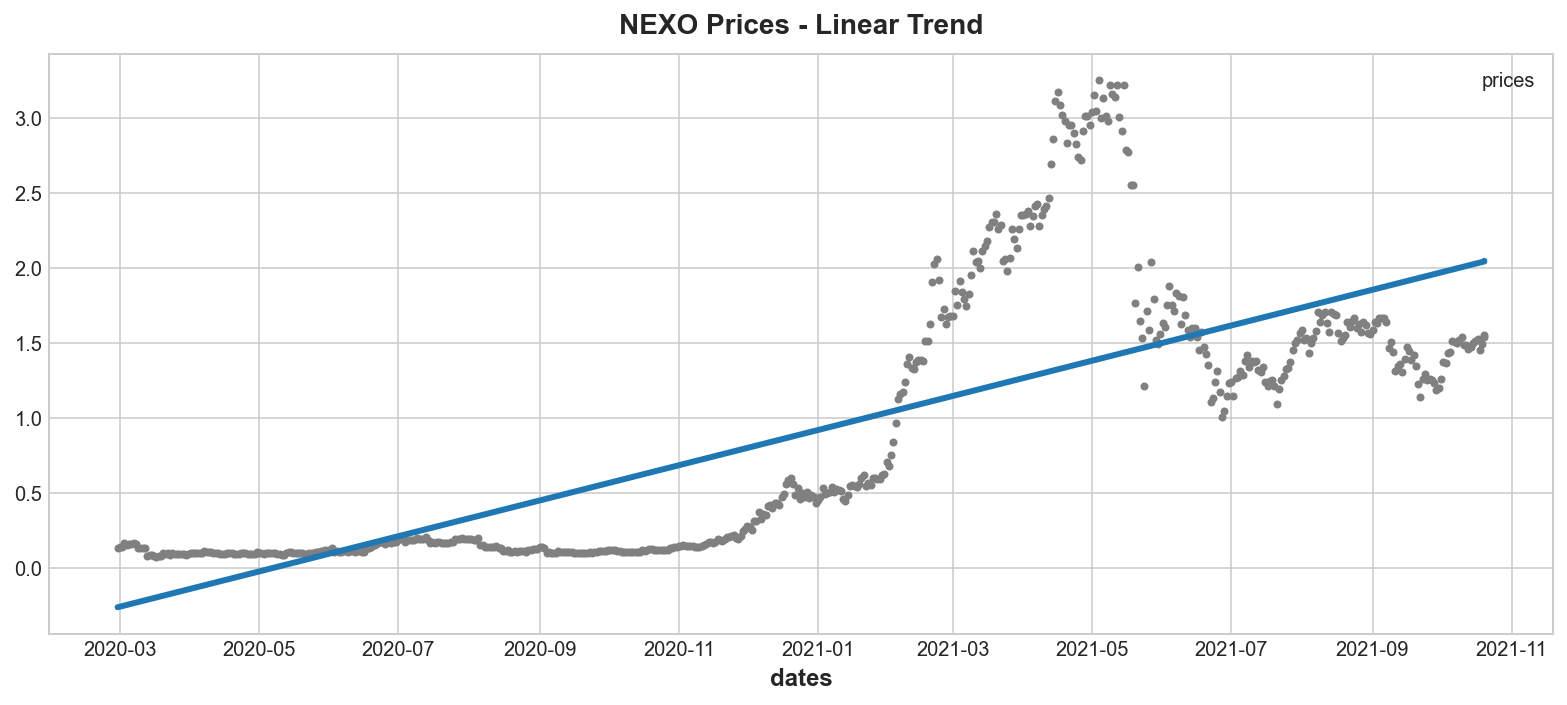

In [9]:
ax = df.plot(style=".", color="0.5", title="NEXO Prices - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")